<img src="./images/banner.png" width="800">

# Generalized Linear Models (GLMs)

Generalized Linear Models (GLMs) represent a flexible generalization of ordinary linear regression that allows for response variables that have error distribution models other than a normal distribution. GLMs extend the linear model framework to encompass a wider range of analysis scenarios, making them a powerful tool in a data scientist's toolkit.


GLMs are a unifying framework that includes linear regression, logistic regression, and many other statistical models as special cases. They provide a systematic way to handle various types of response variables (continuous, binary, counts) within a single coherent framework.


GLMs extend ordinary linear regression by allowing:
1. The response variable to follow any distribution from the exponential family.
2. A linear model to be related to the response variable via a link function.


GLMs were introduced by John Nelder and Robert Wedderburn in 1972. Their work unified various statistical models, including linear regression, logistic regression, and Poisson regression under a single framework. This unification greatly simplified the theoretical understanding and practical application of these models.


GLMs offer several advantages over traditional linear models:

1. **Flexibility**: They can handle response variables with non-normal distributions.
2. **Unified Framework**: Many common statistical models can be expressed as GLMs.
3. **Interpretability**: They maintain the interpretability of linear models.
4. **Handling Non-linearity**: Through the link function, GLMs can model non-linear relationships.


Understanding GLMs provides a solid foundation for tackling a wide range of statistical modeling problems, from simple linear regression to complex non-linear relationships.


A GLM consists of three main components:

1. **Random Component**: Specifies the probability distribution of the response variable.
2. **Systematic Component**: Specifies the linear predictor (a linear combination of predictors).
3. **Link Function**: Specifies how the mean of the response relates to the linear predictor.


We'll explore each of these components in detail in the following sections.


GLMs find applications in various fields:

- **Economics**: Modeling count data (e.g., number of purchases)
- **Epidemiology**: Analyzing disease incidence rates
- **Ecology**: Studying species abundance
- **Marketing**: Predicting customer behavior
- **Finance**: Risk assessment and credit scoring


🤔 **Why This Matters:** GLMs provide a versatile approach to modeling various types of data, allowing researchers and analysts to tackle a wide range of real-world problems within a consistent statistical framework.


It's important to understand how GLMs relate to other models you might be familiar with:

- **Linear Regression**: A special case of GLM with normal distribution and identity link function.
- **Logistic Regression**: A GLM with binomial distribution and logit link function.
- **Poisson Regression**: A GLM with Poisson distribution and log link function.


> **Important Note:** While GLMs are powerful, they still make certain assumptions (e.g., independence of observations) that should be verified for valid inference.


In the following sections, we'll delve deeper into the mathematical foundations of GLMs, explore common types of GLMs for regression, and learn how to implement and interpret these models in practice.

**Table of contents**<a id='toc0_'></a>    
- [Components of Generalized Linear Models](#toc1_)    
  - [Random Component](#toc1_1_)    
  - [Systematic Component](#toc1_2_)    
  - [Link Function](#toc1_3_)    
  - [Putting It All Together](#toc1_4_)    
  - [Example: Poisson Regression](#toc1_5_)    
  - [Advantages of This Structure](#toc1_6_)    
- [The Exponential Family of Distributions](#toc2_)    
  - [Common Distributions in the Exponential Family](#toc2_1_)    
  - [Properties of the Exponential Family](#toc2_2_)    
  - [Importance in GLMs](#toc2_3_)    
  - [Example: Poisson Distribution](#toc2_4_)    
- [Link Functions and Their Role](#toc3_)    
  - [Common Link Functions](#toc3_1_)    
  - [Canonical Link Functions](#toc3_2_)    
  - [Role of Link Functions in GLMs](#toc3_3_)    
  - [Choosing a Link Function](#toc3_4_)    
  - [Example: Poisson Regression](#toc3_5_)    
- [Implementing GLMs in Python](#toc4_)    
  - [Fitting a Poisson GLM](#toc4_1_)    
  - [Example: Gamma GLM for Continuous Positive Data](#toc4_2_)    
  - [Key Points to Remember](#toc4_3_)    
- [Summary and Key Takeaways](#toc5_)    

<!-- vscode-jupyter-toc-config
	numbering=false
	anchor=true
	flat=false
	minLevel=2
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

## <a id='toc1_'></a>[Components of Generalized Linear Models](#toc0_)

Generalized Linear Models consist of three essential components that work together to provide a flexible framework for modeling various types of data. Understanding these components is crucial for effectively applying GLMs to real-world problems.


These components are:
1. **Random Component**: Specifies the probability distribution of the response variable (Y).
2. **Systematic Component**: Defines the linear predictor, which is a combination of the predictor variables (X).
3. **Link Function**: Connects the random and systematic components by relating the expected value of the response variable to the linear predictor.


In the following sections, we will explore each of these components in detail, providing examples and key concepts to help you understand their roles and applications in GLMs.


### <a id='toc1_1_'></a>[Random Component](#toc0_)


The random component specifies the probability distribution of the response variable (Y) in a GLM. It determines the type of data that can be modeled using the GLM framework.
- It belongs to the exponential family of distributions.
- Common distributions include Normal, Binomial, Poisson, Gamma, and Inverse Gaussian.


The choice of distribution depends on the nature of your response variable. For example:
- Continuous data: Normal or Gamma distribution
- Count data: Poisson distribution
- Binary data: Binomial distribution


### <a id='toc1_2_'></a>[Systematic Component](#toc0_)


The systematic component, also known as the linear predictor, specifies how the predictors (X) combine to produce the predicted values. It is a linear function of the predictor variables and their coefficients:

$$ \eta = X\beta $$

Where:
- $\eta$ is the linear predictor
- $X$ is the matrix of predictor variables
- $\beta$ is the vector of regression coefficients


💡 **Pro Tip:** The systematic component is similar to the right-hand side of a linear regression equation, allowing for straightforward interpretation of coefficients.


### <a id='toc1_3_'></a>[Link Function](#toc0_)


The link function (g) connects the random and systematic components by relating the expected value of the response variable to the linear predictor. It transforms the mean of the response variable to ensure that it is related to the linear predictor in a specific way. The relationship can be expressed as:

$$ g(E(Y)) = \eta = X\beta $$

Where:
- $g()$ is the link function
- $E(Y)$ is the expected value of the response variable


Common link functions include:
1. **Identity**: $g(\mu) = \mu$ (used in linear regression)
2. **Log**: $g(\mu) = \log(\mu)$ (used in Poisson regression)
3. **Logit**: $g(\mu) = \log(\frac{\mu}{1-\mu})$ (used in logistic regression)
4. **Inverse**: $g(\mu) = \frac{1}{\mu}$ (used in some GLMs for continuous data)


🤔 **Why This Matters:** The link function allows GLMs to model non-linear relationships between predictors and the response variable while maintaining the linear structure of the model.


### <a id='toc1_4_'></a>[Putting It All Together](#toc0_)


The general form of a GLM can be expressed as:

$$ g(E(Y)) = X\beta $$


Or, in terms of the response variable:

$$ E(Y) = g^{-1}(X\beta) $$

Where $g^{-1}()$ is the inverse of the link function.


### <a id='toc1_5_'></a>[Example: Poisson Regression](#toc0_)


Let's consider a Poisson regression model as an example:

1. **Random Component**: Y follows a Poisson distribution
2. **Systematic Component**: $\eta = \beta_0 + \beta_1X_1 + \beta_2X_2 + ... + \beta_pX_p$
3. **Link Function**: Log link, $g(\mu) = \log(\mu)$


The model can be written as:

$$ \log(E(Y)) = \beta_0 + \beta_1X_1 + \beta_2X_2 + ... + \beta_pX_p $$


> **Important Note:** The choice of distribution and link function should be based on the nature of your data and the research question. Inappropriate choices can lead to poor model fit and incorrect inferences.


### <a id='toc1_6_'></a>[Advantages of This Structure](#toc0_)


1. **Flexibility**: Can model various types of response variables.
2. **Unified Approach**: Provides a consistent framework for many statistical models.
3. **Interpretability**: Maintains the interpretability of coefficients (with appropriate link functions).
4. **Extendability**: Easily extended to handle more complex data structures.


By understanding these components and how they interact, you'll be better equipped to choose appropriate GLMs for your data and interpret their results accurately. In the next sections, we'll explore specific types of GLMs and how to implement them in practice.

## <a id='toc2_'></a>[The Exponential Family of Distributions](#toc0_)

The exponential family of distributions plays a central role in Generalized Linear Models. This family encompasses a wide range of probability distributions, providing the flexibility needed to model various types of data.


A probability distribution is a member of the exponential family if its probability density function (or probability mass function for discrete distributions) can be expressed in the following form:

$$ f(y; \theta, \phi) = \exp\left(\frac{y\theta - b(\theta)}{a(\phi)} + c(y, \phi)\right) $$

Where:
- $y$ is the observed data
- $\theta$ is the natural (or canonical) parameter
- $\phi$ is the dispersion parameter
- $a(\phi)$, $b(\theta)$, and $c(y, \phi)$ are known functions


Key components of the exponential family include:
1. **Natural Parameter ($\theta$)**: Relates to the mean of the distribution.
2. **Dispersion Parameter ($\phi$)**: Controls the variance of the distribution.
3. **Functions $a(\phi)$, $b(\theta)$, and $c(y, \phi)$**: Determine the specific form of the distribution.


### <a id='toc2_1_'></a>[Common Distributions in the Exponential Family](#toc0_)


1. **Normal (Gaussian) Distribution**
   - Used for continuous data
   - $\theta = \mu$, $\phi = \sigma^2$

2. **Binomial Distribution**
   - Used for binary data or proportions
   - $\theta = \log(\frac{p}{1-p})$, where $p$ is the probability of success

3. **Poisson Distribution**
   - Used for count data
   - $\theta = \log(\lambda)$, where $\lambda$ is the rate parameter

4. **Gamma Distribution**
   - Used for positive continuous data, often for modeling variances
   - $\theta = -\frac{1}{\mu}$

5. **Inverse Gaussian Distribution**
   - Used for positive continuous data with a right-skewed distribution
   - $\theta = -\frac{1}{2\mu^2}$


### <a id='toc2_2_'></a>[Properties of the Exponential Family](#toc0_)


1. **Mean and Variance**: For distributions in this family, the mean and variance can be derived from the functions $b(\theta)$ and $a(\phi)$:
   - $E(Y) = b'(\theta)$
   - $Var(Y) = b''(\theta)a(\phi)$

2. **Sufficiency**: The statistic $\sum y_i$ is sufficient for $\theta$.

3. **Maximum Likelihood Estimation**: The maximum likelihood estimates for these distributions have consistent properties.


### <a id='toc2_3_'></a>[Importance in GLMs](#toc0_)


The exponential family is crucial for GLMs because:

1. It provides a unified framework for handling various types of response variables.
2. The properties of these distributions simplify the estimation process in GLMs.
3. It allows for a consistent approach to inference across different types of data.


### <a id='toc2_4_'></a>[Example: Poisson Distribution](#toc0_)


The Poisson distribution, commonly used for count data, can be expressed in the exponential family form:

$$ f(y; \lambda) = \exp(y\log(\lambda) - \lambda - \log(y!)) $$

Here, $\theta = \log(\lambda)$, $b(\theta) = e^\theta = \lambda$, $a(\phi) = 1$, and $c(y, \phi) = -\log(y!)$.


Understanding the exponential family of distributions is key to grasping the flexibility and power of GLMs. It provides the mathematical foundation for extending linear models to a wide range of data types and research questions.

## <a id='toc3_'></a>[Link Functions and Their Role](#toc0_)

Link functions are a crucial component of Generalized Linear Models, connecting the linear predictor to the expected value of the response variable. They allow GLMs to model non-linear relationships while maintaining the linear structure of the predictor.


A link function, denoted as $g(\mu)$, relates the expected value of the response variable $Y$ to the linear predictor $\eta$:

$$ g(E(Y)) = g(\mu) = \eta = X\beta $$

Where:
- $E(Y) = \mu$ is the expected value of the response variable
- $X$ is the matrix of predictor variables
- $\beta$ is the vector of coefficients


The inverse of the link function, $g^{-1}(\eta)$, gives the expected value of $Y$:

$$ E(Y) = \mu = g^{-1}(\eta) = g^{-1}(X\beta) $$


### <a id='toc3_1_'></a>[Common Link Functions](#toc0_)


1. **Identity Link**: $g(\mu) = \mu$
   - Used in linear regression
   - Applicable when the response variable can take any real value

2. **Log Link**: $g(\mu) = \log(\mu)$
   - Used in Poisson regression for count data
   - Ensures that predicted values are always positive

3. **Logit Link**: $g(\mu) = \log(\frac{\mu}{1-\mu})$
   - Used in logistic regression for binary data
   - Maps probabilities to the entire real line

4. **Inverse Link**: $g(\mu) = \frac{1}{\mu}$
   - Used in some GLMs for continuous data, such as Gamma regression

5. **Probit Link**: $g(\mu) = \Phi^{-1}(\mu)$
   - Where $\Phi^{-1}$ is the inverse of the standard normal cumulative distribution function
   - Alternative to logit for binary data


### <a id='toc3_2_'></a>[Canonical Link Functions](#toc0_)


Each distribution in the exponential family has a canonical (or natural) link function. This is the function that transforms the mean to the natural parameter of the distribution. For example:

- Normal distribution: Identity link
- Binomial distribution: Logit link
- Poisson distribution: Log link
- Gamma distribution: Inverse link


Using the canonical link often simplifies the mathematical properties of the model, but it's not always necessary or optimal.


### <a id='toc3_3_'></a>[Role of Link Functions in GLMs](#toc0_)


1. **Linearity**: Link functions allow the model to maintain a linear relationship between predictors and the transformed response, even when the actual relationship is non-linear.

2. **Range Restriction**: They ensure that predictions fall within the appropriate range for the response variable (e.g., positive values for count data, probabilities between 0 and 1 for binary data).

3. **Interpretability**: Proper choice of link function can lead to more interpretable models. For instance, the log link in Poisson regression allows coefficients to be interpreted as multiplicative effects on the response.

4. **Flexibility**: Different link functions can be used with the same distribution, allowing for flexibility in modeling various relationships.


### <a id='toc3_4_'></a>[Choosing a Link Function](#toc0_)


The choice of link function should be based on:

1. The nature of the response variable
2. The assumed relationship between predictors and response
3. Ease of interpretation
4. Goodness of fit to the data


It's often beneficial to try multiple link functions and compare their performance using model diagnostics and fit statistics.


### <a id='toc3_5_'></a>[Example: Poisson Regression](#toc0_)


In Poisson regression for count data, we typically use the log link:

$$ \log(E(Y)) = X\beta $$


This can be rewritten as:

$$ E(Y) = \exp(X\beta) $$


This formulation ensures that predicted counts are always non-negative and allows for multiplicative effects of predictors on the response.


Understanding link functions is crucial for properly specifying and interpreting GLMs. They provide the flexibility to model a wide range of data types and relationships while maintaining the fundamental linear structure of the model.

## <a id='toc4_'></a>[Implementing GLMs in Python](#toc0_)

In this section, we'll focus on implementing GLMs for regression tasks using Python. We'll use the statsmodels library, which provides a comprehensive set of tools for estimating various statistical models, including GLMs. We'll walk through an example of fitting a Poisson regression model to count data and interpreting the results.


### <a id='toc4_1_'></a>[Fitting a Poisson GLM](#toc0_)


First, let's import the necessary libraries:


In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from scipy import stats

For this example, we'll create a synthetic dataset to demonstrate a Poisson regression, which is useful for modeling count data:


In [3]:
np.random.seed(0)
n = 1000
X = np.random.randn(n, 2)
X = sm.add_constant(X)  # Add a constant term for the intercept
beta = [1, 0.5, -0.5]
lambda_ = np.exp(X.dot(beta))
y = stats.poisson.rvs(lambda_)

df = pd.DataFrame({'y': y, 'x1': X[:, 1], 'x2': X[:, 2]})
df

,y,x1,x2
0,4,1.764052,0.400157
1,1,0.978738,2.240893
2,11,1.867558,-0.977278
3,4,0.950088,-0.151357
4,2,-0.103219,0.410599
...,...,...,...
995,8,1.342622,-0.739936
996,4,1.315138,-0.323457
997,3,0.197828,0.097751
998,6,1.401523,0.158434


Now, let's fit a Poisson GLM to our data:


In [5]:
poisson_model = sm.GLM(df['y'], X, family=sm.families.Poisson())
poisson_results = poisson_model.fit()

poisson_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                 1000
Model:                            GLM   Df Residuals:                      997
Model Family:                 Poisson   Df Model:                            2
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1833.6
Date:                Mon, 02 Sep 2024   Deviance:                       1046.0
Time:                        01:43:57   Pearson chi2:                     926.
No. Iterations:                     5   Pseudo R-squ. (CS):             0.7888
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.9857      0.021     47.463      0.000       0.945       1.026
x1             0.4714      0.017     27.034      0.000       0.437       0.506
x2            -0.5034      0.018    -28.477      0.000      -0.538      -0.469
==============================================================================
"""

This will display a summary of the model, including coefficient estimates, standard errors, and p-values.


The coefficients in a Poisson regression are interpreted as the change in the log of the expected counts for a one-unit increase in the predictor variable. To get the multiplicative effect on the response variable, we need to exponentiate the coefficients:


In [6]:
exp_coefficients = np.exp(poisson_results.params)
print("Exponentiated coefficients:")
print(exp_coefficients)

Exponentiated coefficients:
const    2.679726
x1       1.602295
x2       0.604473
dtype: float64


In [ ]:
# We use random loss as a baseline to compare the loss of the model
y_random = stats.poisson.rvs(np.exp(X.dot(beta)))
print("Random loss: ", np.mean((y - y_random) ** 2))

Random loss:  6.878


In [9]:
y_pred = poisson_results.predict(X)
print("Loss: ", np.mean((y - y_pred) ** 2))

Loss:  3.2181597225957455


It's important to check the model's goodness of fit. We can plot the residuals to check for any patterns:


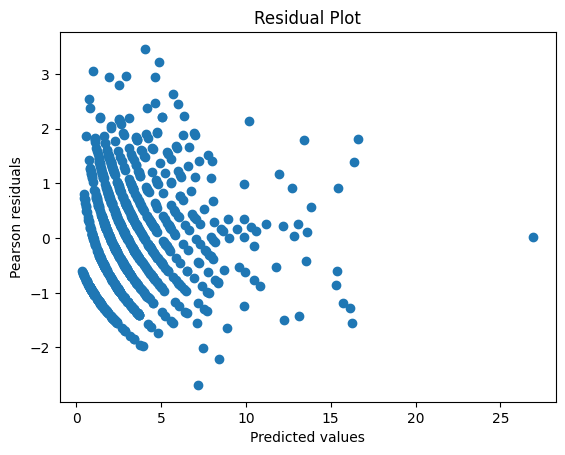

In [7]:
residuals = poisson_results.resid_pearson
plt.scatter(poisson_results.predict(), residuals)
plt.xlabel('Predicted values')
plt.ylabel('Pearson residuals')
plt.title('Residual Plot')
plt.show()

We can use our fitted model to make predictions:


In [8]:
new_data = np.array([[1, 0.5, -0.5]])  # Include the constant term
predicted_count = poisson_results.predict(new_data)
print(f"Predicted count: {predicted_count[0]:.2f}")

Predicted count: 4.36


### <a id='toc4_2_'></a>[Example: Gamma GLM for Continuous Positive Data](#toc0_)


For comparison, let's also implement a Gamma GLM, which is useful for modeling continuous, positive, right-skewed data:


In [11]:
# Generate synthetic data for Gamma GLM
shape, scale = 2., 2.
y_gamma = np.random.gamma(shape, scale, n)
X_gamma = sm.add_constant(np.random.randn(n, 2))

# Fit Gamma GLM
gamma_model = sm.GLM(y_gamma, X_gamma, family=sm.families.Gamma(link=sm.families.links.log()))
gamma_results = gamma_model.fit()

gamma_results.summary()

/Users/hejazizo/miniconda3/envs/py310/lib/python3.10/site-packages/statsmodels/genmod/families/links.py:13: FutureWarning: The log link alias is deprecated. Use Log instead. The log link alias will be removed after the 0.15.0 release.
  warnings.warn(


<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                 1000
Model:                            GLM   Df Residuals:                      997
Model Family:                   Gamma   Df Model:                            2
Link Function:                    log   Scale:                         0.48818
Method:                          IRLS   Log-Likelihood:                -2253.0
Date:                Mon, 02 Sep 2024   Deviance:                       494.51
Time:                        01:47:48   Pearson chi2:                     487.
No. Iterations:                    10   Pseudo R-squ. (CS):          0.0003837
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.3933      0.022     63.027      0.000       1.350       1.437
x1             0.0130      0.022      0.585      0.558      -0.031       0.057
x2             0.0030      0.022      0.136      0.892      -0.040       0.045
==============================================================================
"""

### <a id='toc4_3_'></a>[Key Points to Remember](#toc0_)


1. The choice of family in `sm.GLM()` determines the distribution assumption for the response variable.
2. The link function can be specified within the family (e.g., `sm.families.Gamma(link=sm.families.links.log())`).
3. Always check model diagnostics to ensure the model fits the data well.
4. Interpretation of coefficients depends on the chosen link function and family.


By understanding how to implement GLMs in Python, you can apply these models to a wide range of regression problems involving different types of response variables. This flexibility allows you to handle various data types and relationships in your statistical modeling tasks.

## <a id='toc5_'></a>[Summary and Key Takeaways](#toc0_)

Generalized Linear Models (GLMs) provide a flexible framework for modeling a wide range of data types and relationships. Let's recap the key points we've covered:

1. **Components of GLMs**:
   - Random Component: Specifies the probability distribution of the response variable.
   - Systematic Component: Defines the linear predictor combining predictor variables.
   - Link Function: Connects the random and systematic components.

2. **Exponential Family**: GLMs use distributions from the exponential family, including Normal, Poisson, Binomial, and Gamma distributions.

3. **Flexibility**: GLMs extend linear regression to handle various response types (continuous, count, binary) and non-linear relationships.

4. **Link Functions**: Allow modeling of non-linear relationships while maintaining model interpretability.

5. **Model Selection**: Choice of distribution and link function should be based on the nature of the data and research questions.

6. **Implementation**: Python libraries like statsmodels provide tools for fitting and analyzing GLMs.

7. **Interpretation**: Coefficient interpretation depends on the chosen distribution and link function.

8. **Diagnostics**: Model checking, including residual analysis, is crucial for ensuring model validity.


Key Takeaways:

- GLMs unify various statistical models under a common framework.
- They offer greater flexibility than ordinary linear regression while maintaining interpretability.
- Understanding the components of GLMs is crucial for proper model specification and interpretation.
- Practical implementation requires careful consideration of data characteristics and model assumptions.


By mastering GLMs, you've expanded your statistical toolkit to handle a diverse range of regression problems. This knowledge forms a solid foundation for tackling more complex modeling scenarios in your data analysis journey.